This code estimate the drift velocity of the Taylor Bubble in a stagnant liquid using two approaches.

1 - Using a Lagranian approach, the barycenter location of the bubble (dispersed phase) is tracked along the pipe. The plot of position vs. time shows a clear inclined straight line. Thus, a linear fitting algorith estimated the slope of the plot. This slope is considered as the bubble drift velocity.

2 - The drift flux model uses an eulerian approach. The mean drift velocity is defined as the difference between the axial component of the weighted mean velocity of gas phases with the volumetric flux.

\begin{equation*}
\bar{V_d} = <<V_d>> - <j>
\end{equation*}

In [1]:
#Importing required modules.
import os
import re
import numpy as np
import pandas as pd
#%matplotlib notebook
import matplotlib.pyplot as plt

path = os.getcwd()
foldername = os.path.basename(path)
#This data is required to be input by the user for each case.
location=[1.6, 3.62, 6.81]
lastTime=20

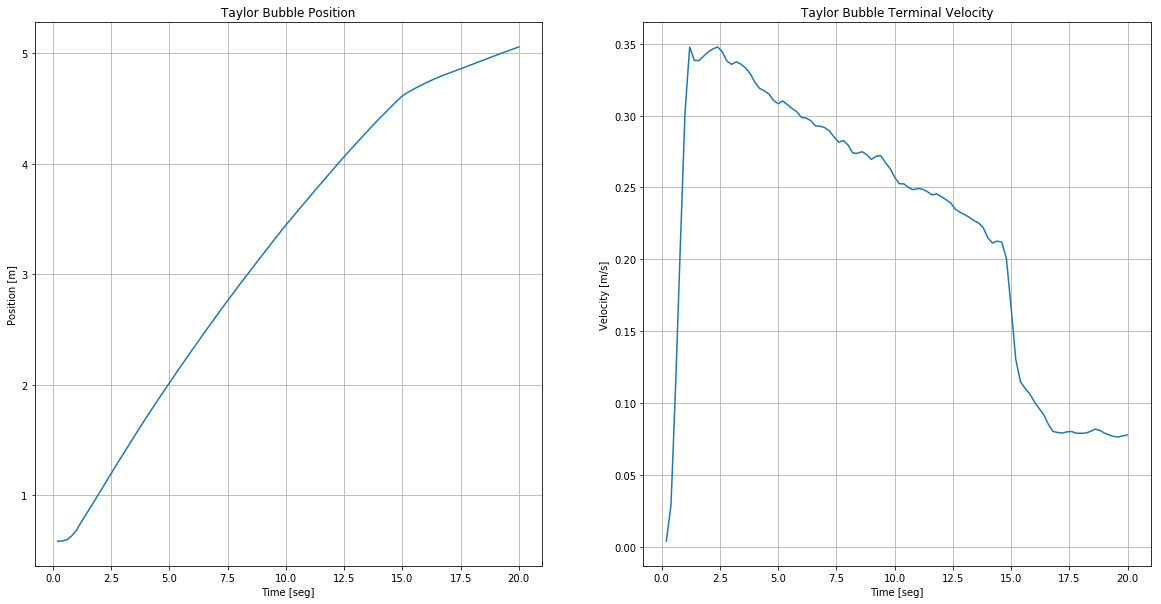

In [2]:
t=[]
x=[]
with open("centert",'r') as position:
    for line in position:
        obj = re.match(r'barycenter',line)
        if obj:
            t.append(line.split(' ')[3])
            x.append(line.split(' ')[6])
t=np.asarray(list(map(float,t)))
x=np.asarray(list(map(float,x)))
v=np.gradient(x,0.2)

plt.figure(1,figsize=(20,10))
plt.subplot(121)
plt.plot(t,x)
plt.xlabel('Time [seg]')
plt.ylabel('Position [m]')
plt.title('Taylor Bubble Position')
plt.grid(which='both')

plt.subplot(122)
plt.plot(t,v)
plt.xlabel('Time [seg]')
plt.ylabel('Velocity [m/s]')
plt.title('Taylor Bubble Terminal Velocity')
plt.grid(which='both')

0.03284798569629955
0.023277511419088247
0.023231986891116264
0.02297843474309565
0.022742947946726006
0.022543145727138884
0.022264937143921092
0.02198503690034711


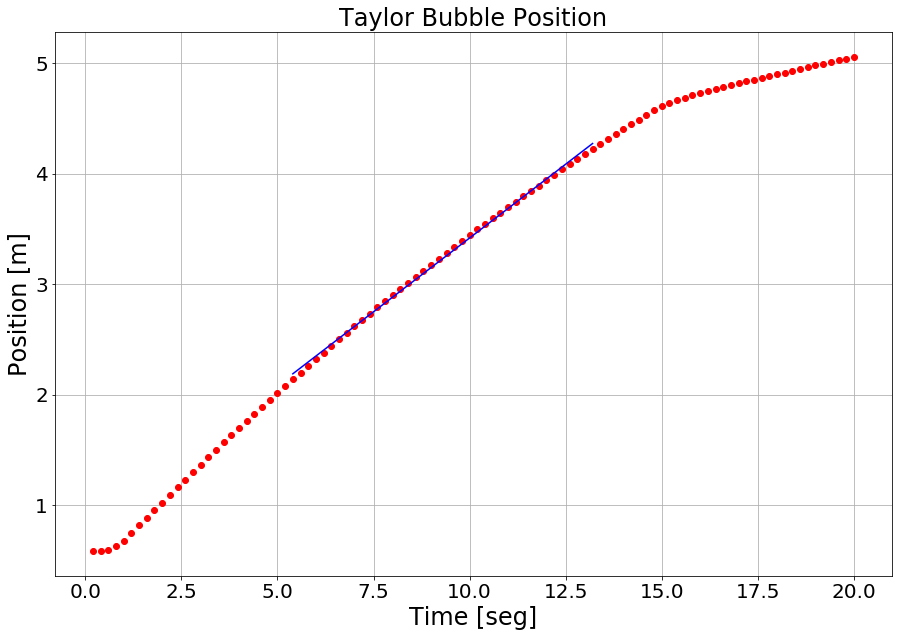

In [3]:
from matplotlib.pyplot import figure, show
from numpy import polyfit
from matplotlib.mlab import stineman_interp
y = x;
x = t;
num_points = len(x)
min_fit_length = 40
chi = 0
chi_min = 10000
i_best = 0
j_best = 0
for i in range(len(x) - min_fit_length-len(x)//3):
    for j in range(i+min_fit_length, len(x)):
        coefs = polyfit(x[i:j],y[i:j],1)
        y_linear = x * coefs[0] + coefs[1]
        chi = 0
        for k in range(i,j):
            chi += ( y_linear[k] - y[k])**2
        if chi < chi_min:
            i_best = i
            j_best = j
            chi_min = chi
            print (chi_min)

coefs = polyfit(x[i_best:j_best],y[i_best:j_best],1)
y_linear = x[i_best:j_best] * coefs[0] + coefs[1]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.plot(x,y,'ro')
ax.plot(x[i_best:j_best],y_linear,'b-')
ax.axes.tick_params(axis='both',labelsize=20)
plt.xlabel('Time [seg]', fontsize = 24)
plt.ylabel('Position [m]', fontsize = 24)
plt.title('Taylor Bubble Position', fontsize = 24)
plt.grid(which='both')
plt.savefig(foldername + "-Taylor Bubble Position.png", dpi = 150)
show()

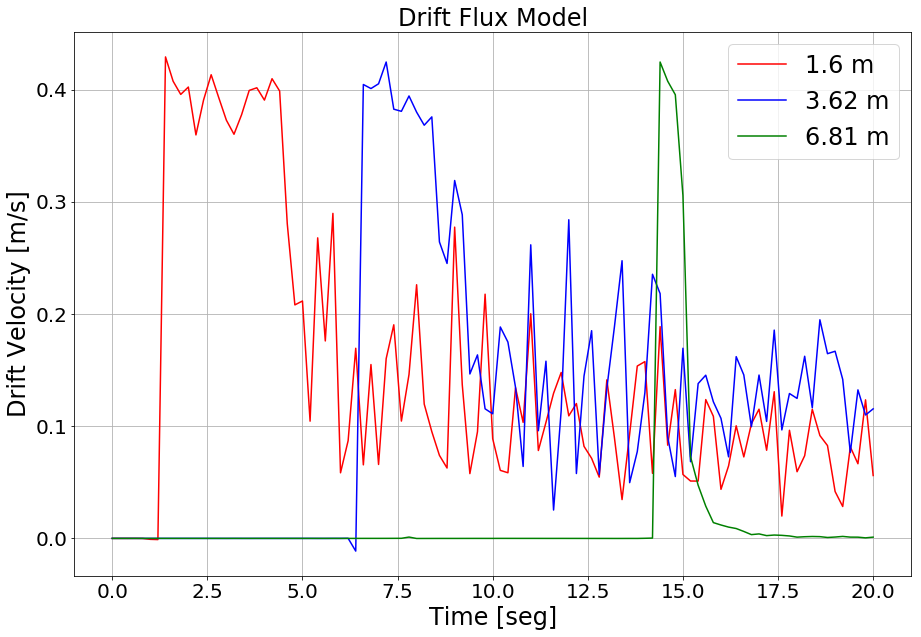

In [4]:

Time=np.arange(0, lastTime+0.2, 0.2)
Results=np.zeros((len(location),len(Time),5))
os.chdir(path)
loc=0
for l in location:
    aux=pd.read_csv(str(l)+'.csv')
    Results[loc, :, :-1]=aux.values
    var_list=list(aux)
    loc=loc+1
for k in range(len(location)):
    Results[k,:,4]=Results[k,:,3]-Results[k,:,2] #Drift Velocity Calculation
var_list.append('V_drift [m/s]')


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.plot(Results[0,:,0],Results[0,:,4],'r',Results[1,:,0],Results[1,:,4],'b',Results[2,:,0],Results[2,:,4],'g')
ax.axes.tick_params(axis='both',labelsize=20)
plt.xlabel('Time [seg]', fontsize = 24)
plt.ylabel('Drift Velocity [m/s]', fontsize = 24)
plt.title('Drift Flux Model', fontsize = 24)
plt.legend(('1.6 m','3.62 m','6.81 m'),loc='best', fontsize = 24)
plt.grid(True)
plt.savefig(foldername + "-Drift Flux Model.png", dpi = 150)
plt.show()

v_drift_ave=np.zeros((1,len(location)))
for k in range(len(location)):
    v_di=[]
    count=0
    for i in range(len(Time)-1):
        diff=np.abs(Results[k,i+1,4]-Results[k,i,4])
        if diff>0.03 and np.abs(Results[k,i+1,4]-coefs[0])<0.05:
            count=count+1
        if diff>0.03 and np.abs(Results[k,i+1,4]-coefs[0])>0.05:
            count=count+1
        if diff<0.03 and count==1:
            v_di.append(Results[k,i,4])
        if count==2:
            break
    v_di=np.asarray(v_di)
    v_drift_ave[0,k]=np.average(v_di)

The first component of "coefs" corresponds to the slope for approach 1.
The "v_drift_ave" vector represent the mean drift velocity at the locations specified by the "location" variable at the beginning.

In [5]:
coefs

array([0.2670092 , 0.74751071])

In [6]:
v_drift_ave

array([[0.41095186, 0.4037397 , 0.41622441]])

In [7]:
count

2

In [8]:
v_di

array([0.42478223, 0.40766658])